In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('Resume.csv')

In [5]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df.shape

(2484, 4)

In [7]:
df['Category']

0             HR
1             HR
2             HR
3             HR
4             HR
          ...   
2479    AVIATION
2480    AVIATION
2481    AVIATION
2482    AVIATION
2483    AVIATION
Name: Category, Length: 2484, dtype: object

In [8]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

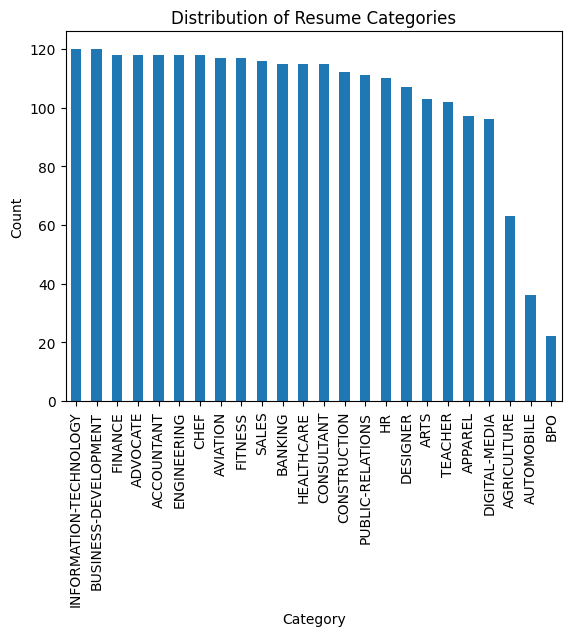

In [9]:
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Resume Categories')
plt.show()

<Axes: xlabel='count', ylabel='Category'>

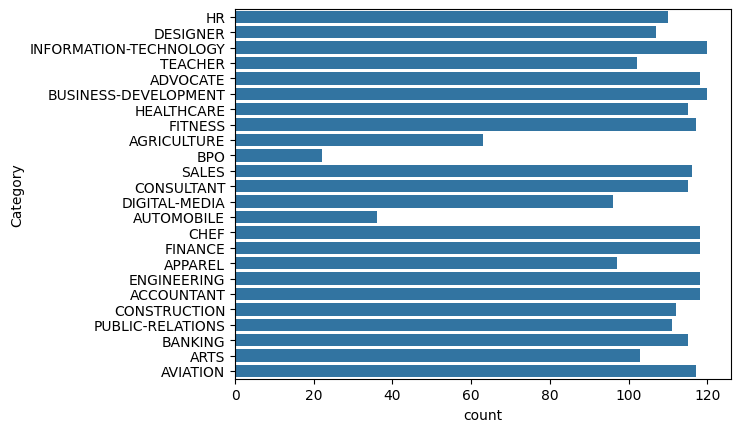

In [10]:
sns.countplot(df['Category'])

([<matplotlib.patches.Wedge at 0x114e843d0>,
 [Text(-0.9398614573727001, 0.5715421602517738, 'HR'),
  Text(-1.067727917826208, 0.26449403300360186, 'DESIGNER'),
  Text(-1.0981389794165746, -0.06395922049184331, 'INFORMATION-TECHNOLOGY'),
  Text(-1.0307771319099144, -0.384055340194055, 'TEACHER'),
  Text(-0.8722652862499938, -0.6701889811114597, 'ADVOCATE'),
  Text(-0.6366194881506746, -0.8970594335420442, 'BUSINESS-DEVELOPMENT'),
  Text(-0.34467878389826484, -1.0446035304987311, 'HEALTHCARE'),
  Text(-0.02364933535236084, -1.0997457474059136, 'FITNESS'),
  Text(0.2981156116581108, -1.0588328867605645, 'AGRICULTURE'),
  Text(0.5927879633253765, -0.9266080242133414, 'BPO'),
  Text(0.8345461178803798, -0.7166120129685151, 'SALES'),
  Text(1.0050129022503682, -0.4471566462776689, 'CONSULTANT'),
  Text(1.091037739085791, -0.14013083847092872, 'DIGITAL-MEDIA'),
  Text(1.0860627630106925, 0.1745499206576171, 'AUTOMOBILE'),
  Text(0.9945747311425429, 0.4699160607733456, 'CHEF'),
  Text(0.82633

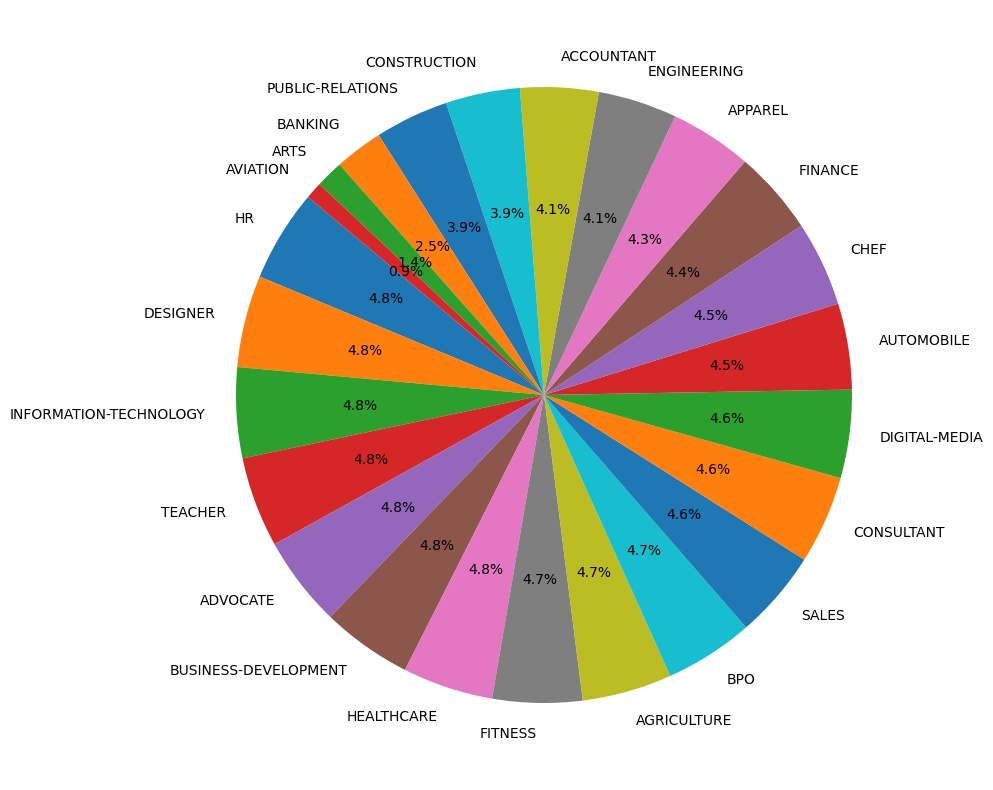

In [11]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)

In [12]:
df['Category'][0]

'HR'

In [14]:
df['Resume_str']

0                HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1                HR SPECIALIST, US HR OPERATIONS      ...
2                HR DIRECTOR       Summary      Over 2...
3                HR SPECIALIST       Summary    Dedica...
4                HR MANAGER         Skill Highlights  ...
                              ...                        
2479             RANK: SGT/E-5 NON- COMMISSIONED OFFIC...
2480             GOVERNMENT RELATIONS, COMMUNICATIONS ...
2481             GEEK SQUAD AGENT         Professional...
2482             PROGRAM DIRECTOR / OFFICE MANAGER    ...
2483             STOREKEEPER II       Professional Sum...
Name: Resume_str, Length: 2484, dtype: object

In [15]:
df['Resume_str'][0]

"         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

In [22]:
import re
def cleanResume(txt):
    cleantxt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    cleantxt = re.sub('RT|cc', ' ', cleantxt)  # remove RT and cc
    cleantxt = re.sub('#\S+', ' ', cleantxt)  # remove hashtags
    cleantxt = re.sub('@\S+', ' ', cleantxt)  # remove mentions
    cleantxt = re.sub('[%$&*<>#@()~`/-:]', ' ', cleantxt)  # remove special characters
    cleantxt = re.sub(r'[^\x00-\x7F]+', ' ', cleantxt)  # remove non-ASCII characters
    cleantxt = re.sub('\s+', ' ', cleantxt)  # remove extra whitespace
    return cleantxt

In [23]:
df['Resume_str'] = df['Resume_str'].apply(lambda x: cleanResume(x))

In [24]:
df['Resume_str'][0]

" HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMINISTRATOR Summary Dedicated Customer Service Manager with + years of experience in Hospitality and Customer Service Management. Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service. Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multi-tasker Client relations specialist A omplishments Missouri DOT Supervisor Training Certification Certified by IHG in Customer Loyalty and Marketing by Segment Hilton Worldwide General Manager Training Certification A omplished Trainer for cross server hospitality systems such as Hilton OnQ , Micros Opera PMS , Fidelio OPERA Reservation System ORS , Holidex Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment. Experience HR Adminis

WORDS INTO CATEGORICL VALUES

In [25]:
df['Category']

0             HR
1             HR
2             HR
3             HR
4             HR
          ...   
2479    AVIATION
2480    AVIATION
2481    AVIATION
2482    AVIATION
2483    AVIATION
Name: Category, Length: 2484, dtype: object

In [26]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS Summary Versa...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over years experience in ...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,"HR SPECIALIST Summary Dedicated, Driven, and ...","<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights HR SKILLS HR Depa...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK SGT E- NON- COMMISSIONED OFFICER IN CHAR...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGA...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional Profile IT supp...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR OFFICE MANAGER Summary Highl...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [30]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...,"<div class=""fontsize fontface vmargins hmargin...",19
1,22323967,"HR SPECIALIST, US HR OPERATIONS Summary Versa...","<div class=""fontsize fontface vmargins hmargin...",19
2,33176873,HR DIRECTOR Summary Over years experience in ...,"<div class=""fontsize fontface vmargins hmargin...",19
3,27018550,"HR SPECIALIST Summary Dedicated, Driven, and ...","<div class=""fontsize fontface vmargins hmargin...",19
4,17812897,HR MANAGER Skill Highlights HR SKILLS HR Depa...,"<div class=""fontsize fontface vmargins hmargin...",19
...,...,...,...,...
2479,99416532,RANK SGT E- NON- COMMISSIONED OFFICER IN CHAR...,"<div class=""fontsize fontface vmargins hmargin...",6
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGA...","<div class=""fontsize fontface vmargins hmargin...",6
2481,31605080,GEEK SQUAD AGENT Professional Profile IT supp...,"<div class=""fontsize fontface vmargins hmargin...",6
2482,21190805,PROGRAM DIRECTOR OFFICE MANAGER Summary Highl...,"<div class=""fontsize fontface vmargins hmargin...",6


In [31]:
df.Category.unique()

array([19, 13, 20, 23,  1,  9, 18, 17,  2,  8, 22, 12, 14,  5, 10, 16,  3,
       15,  0, 11, 21,  7,  4,  6])

VECTORIZATION

In [32]:
df['Resume_str'][0]

" HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMINISTRATOR Summary Dedicated Customer Service Manager with + years of experience in Hospitality and Customer Service Management. Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service. Highlights Focused on customer satisfaction Team management Marketing savvy Conflict resolution techniques Training and development Skilled multi-tasker Client relations specialist A omplishments Missouri DOT Supervisor Training Certification Certified by IHG in Customer Loyalty and Marketing by Segment Hilton Worldwide General Manager Training Certification A omplished Trainer for cross server hospitality systems such as Hilton OnQ , Micros Opera PMS , Fidelio OPERA Reservation System ORS , Holidex Completed courses and seminars in customer service, sales strategies, inventory control, loss prevention, safety, time management, leadership and performance assessment. Experience HR Adminis

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit_transform(df['Resume_str'])
requiredtxt = tfidf.transform(df['Resume_str'])

In [34]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR MARKETING ASSOCIATE HR ADMIN...,"<div class=""fontsize fontface vmargins hmargin...",19
1,22323967,"HR SPECIALIST, US HR OPERATIONS Summary Versa...","<div class=""fontsize fontface vmargins hmargin...",19
2,33176873,HR DIRECTOR Summary Over years experience in ...,"<div class=""fontsize fontface vmargins hmargin...",19
3,27018550,"HR SPECIALIST Summary Dedicated, Driven, and ...","<div class=""fontsize fontface vmargins hmargin...",19
4,17812897,HR MANAGER Skill Highlights HR SKILLS HR Depa...,"<div class=""fontsize fontface vmargins hmargin...",19
...,...,...,...,...
2479,99416532,RANK SGT E- NON- COMMISSIONED OFFICER IN CHAR...,"<div class=""fontsize fontface vmargins hmargin...",6
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS AND ORGA...","<div class=""fontsize fontface vmargins hmargin...",6
2481,31605080,GEEK SQUAD AGENT Professional Profile IT supp...,"<div class=""fontsize fontface vmargins hmargin...",6
2482,21190805,PROGRAM DIRECTOR OFFICE MANAGER Summary Highl...,"<div class=""fontsize fontface vmargins hmargin...",6


In [35]:
requiredtxt

<2484x37338 sparse matrix of type '<class 'numpy.float64'>'
	with 769476 stored elements in Compressed Sparse Row format>